# **AP155 Lab Assignment**
## Module 6: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Hernandez, Red Christian\
_Student No._: 2022-03646\
_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 30/11/2024 6:35 pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Red Christian F. Hernandez**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: <font color='red'>**100/100**</font>

Score breakdown:
* Problem 1 - <font color='red'>**100/100**</font>

<font color='red'>**signed GC Belinario**</font>

### PROBLEM 1

**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(25 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(25 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(25 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(25 pts.)*

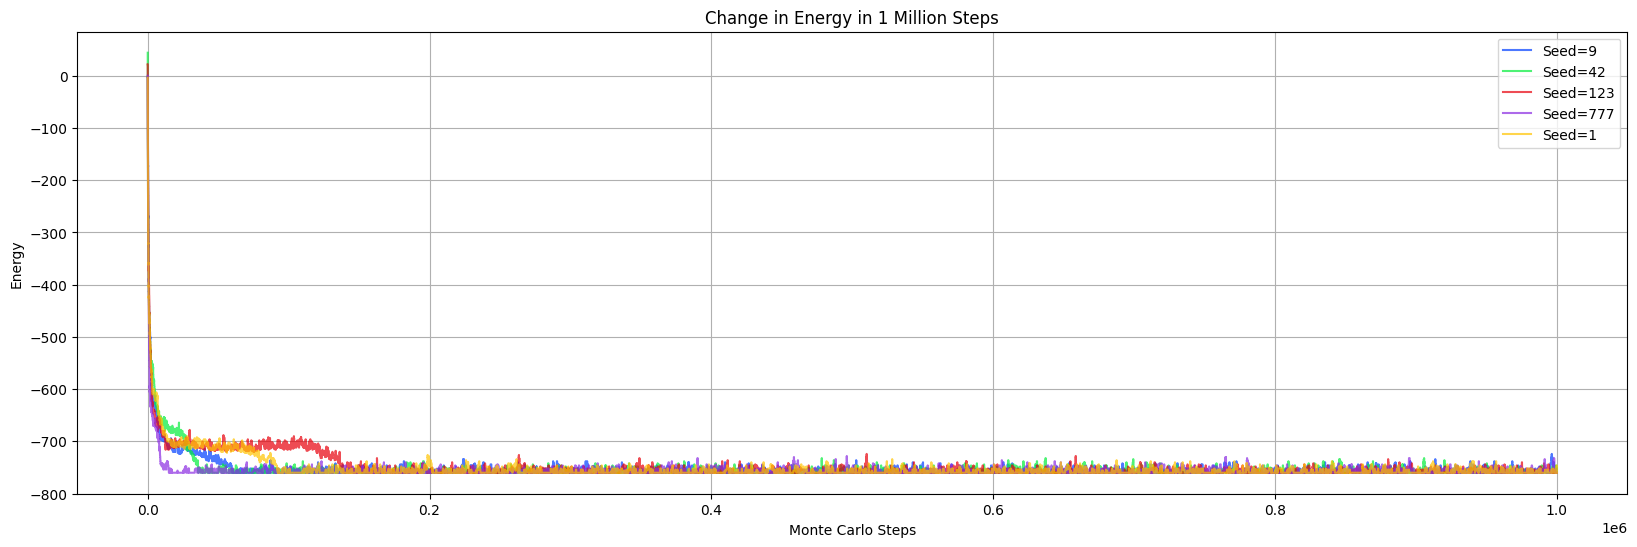

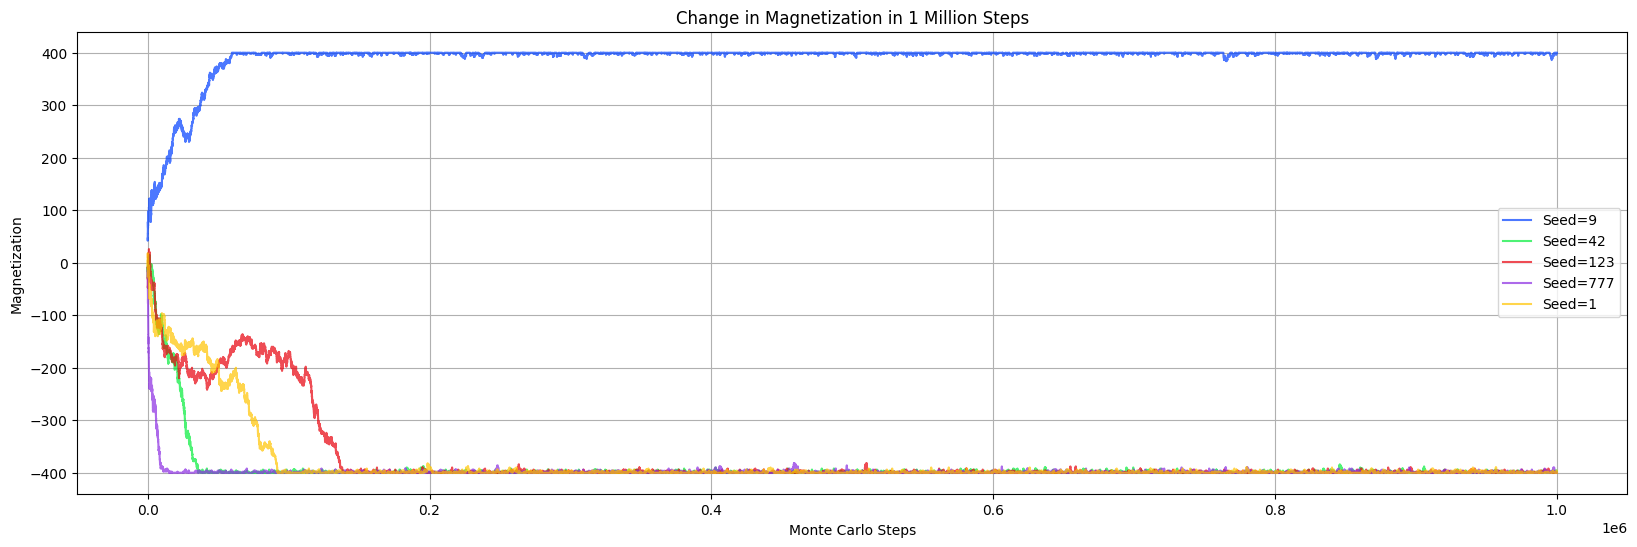

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# parameters
L = 20  # lattice size
J = 1  # coupling size
kb = 1.0  # boltzman constant
T = 1  # temperature
steps = 1000000  # monte carlo steps
seeds = [9, 42, 123, 777, 1]  # list of RNG seeds


# initialize a lattice of 20x20 dimensions with each elements
# being a random value of either 1 or -1
# create multiple latices with varying elements due to different seeds
lattices = [
    np.random.default_rng(seed).choice([-1, 1], size=(L, L)) for seed in seeds
]


def compute_energy(lattice): # we define a function that will compute the energy of the lattice configuration
    s1 = lattice[:-1, :] * lattice[1:, :]  # s1 represents the interaction between the vertical neighbors in the grid
    s2 = lattice[:, :-1] * lattice[:, 1:]  # s2 represents the interaction between the horizontal neighbors in the grid
    E = -J * (np.sum(s1) + np.sum(s2))  # we then compute the total energy
    return E # we return the value for the total energy


def run_simulation(lattice): # we define a function to run the simulation on a given lattice
    E1 = compute_energy(lattice)  # we get the current value for the energy using the compute_energy function on our given randomized lattice
    M1 = np.sum(lattice)  # we get the current value for the magnetization by the summation of all the values in our given lattice array

    E_plot = []  # we initialize an empty array of values for the energy
    M_plot = []  # we initialize an empty array of values for the magnetism

    # the monte carlo simulation
    for k in range(steps):
        # we select a random row and a random column to select a random lattice site
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)

        lattice[i, j] *= -1  # we then flip the sign of the randomly selected latice

        E2 = compute_energy(lattice)  # we then compute for the energy of the new lattice configuration
        E_dif = E2 - E1  # we compute the difference between energy of the previous lattice configuration and the energy of the latest lattice configuration

        # we then apply the metropolis acceptance creterion
        if E_dif > 0: # if the energy increases we consider a acceptance criterion
            # generate a random number and calculate the probability of of acceptance
            # we compare them and if random number generated is less than the probability
            # the new configuration is accepted and a new computation for energy and magnetization is made.
            if np.random.rand() < math.exp(-T * E_dif):
                E1 += E_dif
                M1 = np.sum(lattice)
            else:
                lattice[i, j] *= -1  # if the acceptance criterion is not met we revert the change back
        else: # if the energy decreases, we accept the condition right away and compute for the energy and magnetization
              # of the new configuration
            E1 += E_dif
            M1 = np.sum(lattice)

        # we append the value we have gotten to our array of plots
        E_plot.append(E1)
        M_plot.append(M1)

    return E_plot, M_plot # we return the values for the plot values for energy and magnetism

# we run the simulations on all our different seeded randomly generated lattices
results = [run_simulation(lattice.copy()) for lattice in lattices]

# energy plot
plt.style.use('seaborn-v0_8-bright') # plot style
plt.figure(figsize=(20, 6)) # plot figure size
for idx, (E_plot, _) in enumerate(results): # we loop through the results list
    seed = seeds[idx] # get the value of the seed from the given seed array characterized by their index number
    plt.plot(E_plot, label=f"Seed={seed}", alpha=0.7) # we plot the values for different seeds
plt.title("Change in Energy in 1 Million Steps")  # plot title
plt.xlabel("Monte Carlo Steps") # xlabel
plt.ylabel("Energy") # ylabel
plt.legend() # legend
plt.grid(True) # show grid
plt.show() # show plot

# magnetization plot
plt.style.use('seaborn-v0_8-bright') # plot style
plt.figure(figsize=(20, 6)) # plot figure size
for idx, (_, M_plot) in enumerate(results): # we loop through the results list
    seed = seeds[idx] # get the value of the seed from the given seed array characterized by their index number
    plt.plot(M_plot, label=f"Seed={seed}", alpha=0.7) # we plot the values for different seeds
plt.title("Change in Magnetization in 1 Million Steps") # plot title
plt.xlabel("Monte Carlo Steps") # xlabel
plt.ylabel("Magnetization") # ylabel
plt.legend() # legend
plt.grid(True) # show grid
plt.show() # show plot

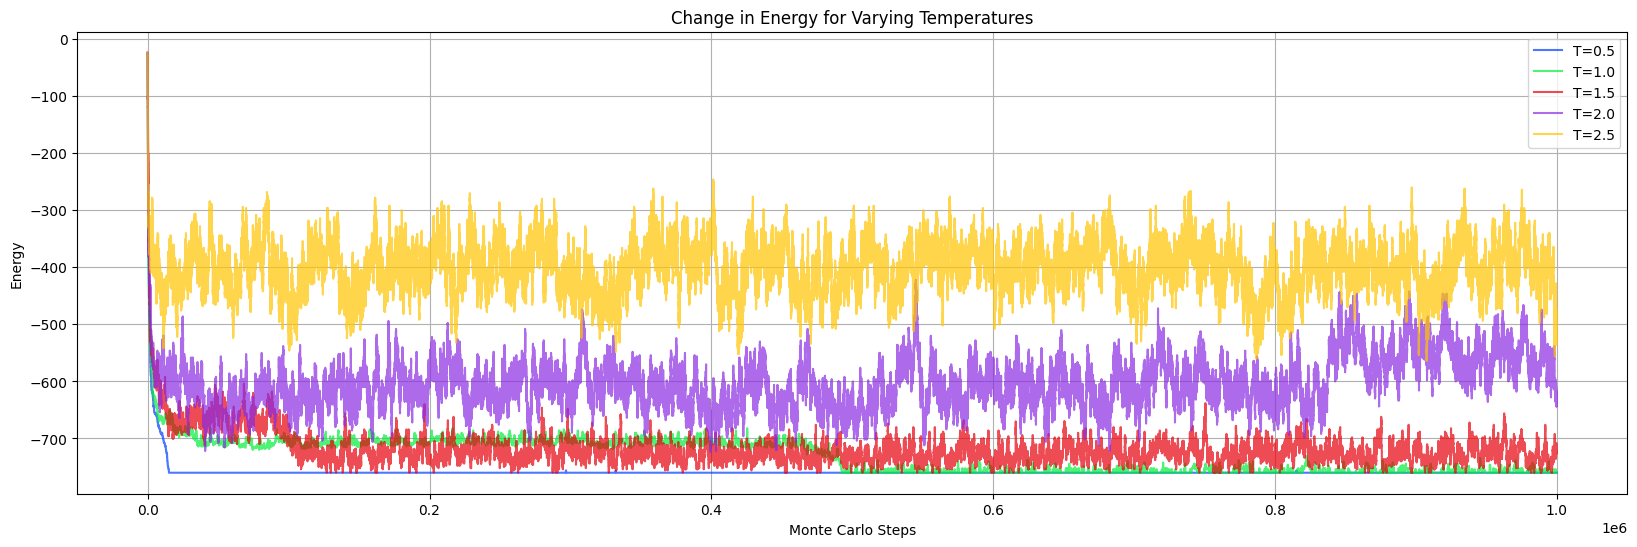

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


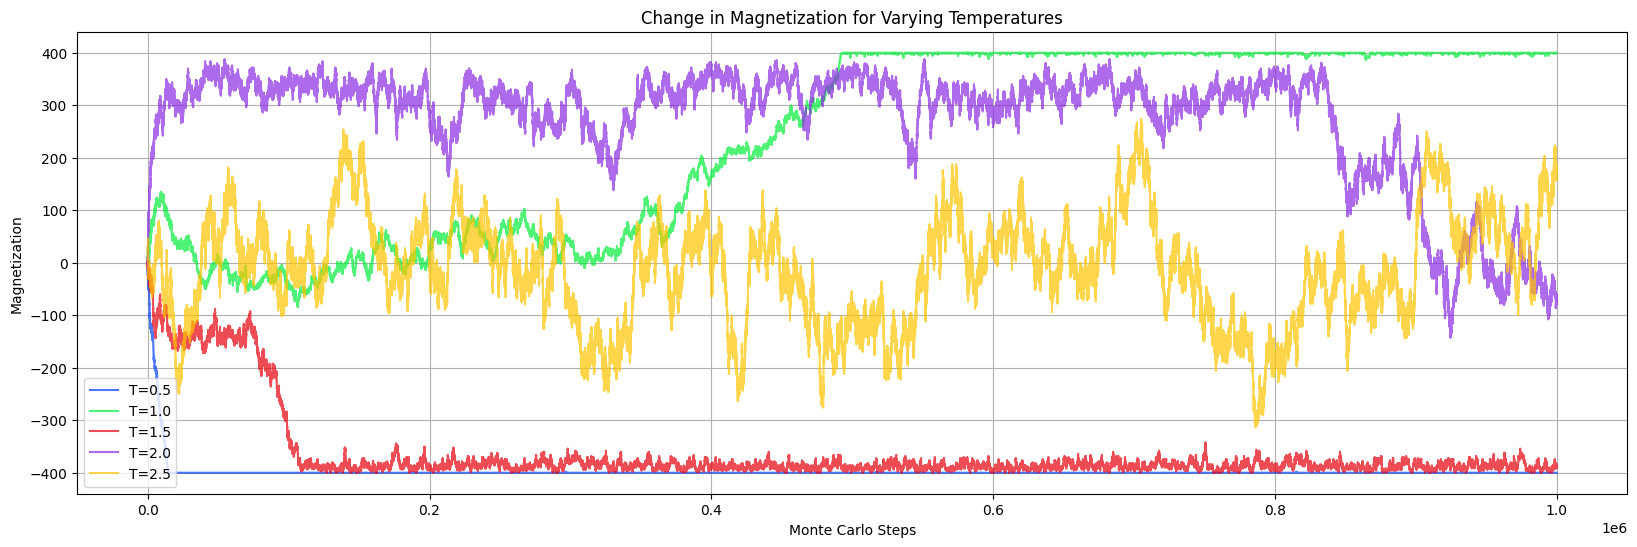

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# parameters
L = 20  # lattice size
J = 1  # coupling constant
kb = 1.0  # boltzman constant
steps = 1000000  # monte carlo steps
seed = 42  # seed
temperatures = [0.5, 1.0, 1.5, 2.0, 2.5]  # array of varying temperatures

np.random.seed(seed) # we set the RNG seed

# initialize a lattice of 20x20 dimensions with each elements
# being a random value of either 1 or -1
lattice = np.random.choice([-1, 1], size=(L, L))


def compute_energy(lattice): # we define a function that will compute the energy of the lattice configuration
    s1 = lattice[:-1, :] * lattice[1:, :]  # s1 represents the interaction between the vertical neighbors in the grid
    s2 = lattice[:, :-1] * lattice[:, 1:]  # s2 represents the interaction between the horizontal neighbors in the grid
    E = -J * (np.sum(s1) + np.sum(s2))  # we then compute the total energy
    return E # we return the value for the total energy


def run_simulation(lattice, T): # we define a function to run the simulation on a given temperature
    E1 = compute_energy(lattice)  # we get the current value for the energy using the compute_energy function on our given randomized lattice
    M1 = np.sum(lattice)  # we get the current value for the magnetization by the summation of all the values in our given lattice array

    E_plot = []  # we initialize an empty array of values for the energy
    M_plot = []  # we initialize an empty array of values for the magnetism

    # the monte carlo simulation
    for k in range(steps):
        # we select a random row and a random column to select a random lattice site
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)

        lattice[i, j] *= -1  # we then flip the sign of the randomly selected latice

        E2 = compute_energy(lattice)  # we then compute for the energy of the new lattice configuration
        E_dif = E2 - E1  # we compute the difference between energy of the previous lattice configuration and the energy of the latest lattice configuration

        # we then apply the metropolis acceptance creterion
        if E_dif > 0: # if the energy increases we consider a acceptance criterion
            # generate a random number and calculate the probability of of acceptance
            # we compare them and if random number generated is less than the probability
            # the new configuration is accepted and a new computation for energy and magnetization is made.
            if np.random.rand() < math.exp(-E_dif / (kb * T)):
                E1 += E_dif
                M1 = np.sum(lattice)
            else:
                lattice[i, j] *= -1  # if the acceptance criterion is not met we revert the change back
        else: # if the energy decreases, we accept the condition right away and compute for the energy and magnetization
              # of the new configuration
            E1 += E_dif
            M1 = np.sum(lattice)

        # we append the value we have gotten to our array of plots
        E_plot.append(E1)
        M_plot.append(M1)

    return E_plot, M_plot # we return the values for the plot values for energy and magnetism

# we run the simulations on all our different temperatures
results = [run_simulation(lattice.copy(), T) for T in temperatures]

# energy plot
plt.style.use('seaborn-v0_8-bright') # plot style
plt.figure(figsize=(20, 6)) # plot figure size
for idx, (E_plot, _) in enumerate(results): # we loop through the results list
    T = temperatures[idx] # get the value of the temperature from the given temperature array characterized by their index number
    plt.plot(E_plot, label=f"T={T}", alpha=0.7) # we plot the values for different temperatures
plt.title("Change in Energy for Varying Temperatures") # plot title
plt.xlabel("Monte Carlo Steps") # xlabel
plt.ylabel("Energy") # ylabel
plt.legend() # legend
plt.grid(True) # show grid
plt.show() # show plot

# magnetization plot
plt.style.use('seaborn-v0_8-bright') # plot style
plt.figure(figsize=(20, 6)) # plot figure size
for idx, (_, M_plot) in enumerate(results): # we loop through the results list
    T = temperatures[idx] # get the value of the temperature from the given temperature array characterized by their index number
    plt.plot(M_plot, label=f"T={T}", alpha=0.7) # we plot the values for different temperatures
plt.title("Change in Magnetization for Varying Temperatures") # plot title
plt.xlabel("Monte Carlo Steps") # xlabel
plt.ylabel("Magnetization") # ylabel
plt.legend() # legend
plt.grid(True) # show grid
plt.show() # show plot

Given a random assortment of initial lattices after a relatively large number of monte carlo steps the energy and magnetization of the system will eventually reach a overall equilibrium.
Thus, concluding that although the initial conditions may influence transient behaviour, the overall long-term equilibrium results are still independent of the initial state but are more heavily dependent on other variables such as temperature (T).

Temperature however plays a crucial role in dictating the behaviour of the Ising model. Higher temperature results in higher energy, less frequent spin alignments leading to lower magnetization and increased randomness. Moreover, lower temperature results in lower energy, more frequent spin alignments leading to higher magnetization and decreased randomness.






<font color=red>Correctness of Code: 50/50 </font> \
<font color=red>Discussion of Code and Results: 50/50 </font>